## (1) Data Description

### Overview

- The dataset was collected by a UBC Computer Science research group studying how people play on a Minecraft server.  
- Two datasets were provided:
  - `players.csv` — player-level information such as demographics, skill, and newsletter subscription.
  - `sessions.csv` — session-level information, where each row represents a single play session (with timestamps, duration, etc.).  
- The data were collected automatically through server logs and voluntary player sign-ups.  


In [6]:
library(tidyverse)

# Loading the datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Observe the first 3 rows
head(players, 3)
head(sessions, 3)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12


The datasets were successfully loaded into R.
The preview above shows the first few rows from both files, confirming that each dataset has multiple variables related to player information and session activity.
Each row in players.csv represents one unique player, while each row in sessions.csv represents one play session recorded on the Minecraft server.

In [5]:
data_shapes <- tibble(
  dataset = c("players.csv", "sessions.csv"),
  rows    = c(nrow(players), nrow(sessions)),
  columns = c(ncol(players), ncol(sessions))
)

data_shapes

dataset,rows,columns
<chr>,<int>,<int>
players.csv,196,7
sessions.csv,1535,5


The table above summarizes the size of each dataset.  
- **Rows** = number of observations (records).  
- **Columns** = number of variables (features).  
`players.csv` contains player-level data, and `sessions.csv` contains session-level data.


In [ ]:
str(players)
str(sessions)

### Variable Summary (players.csv)

I used the `str()` function in R to inspect the structure of both datasets and personally summarized the variables below.  
This includes the variable names, data types, and short descriptions based on what was shown by `str()`.  


| Variable | Type | Description |
|-----------|------|-------------|
| experience | character | Player’s reported experience level (e.g., Pro, Veteran, Amateur). |
| subscribe | logical (TRUE/FALSE) | Whether the player subscribed to the newsletter. |
| hashedEmail | character | Hashed email ID used to match between files. |
| played_hours | numeric | Total hours the player has played. |
| name | character | Player name (not used for modeling). |
| gender | character | Gender identity of the player. |
| Age | numeric | Age of the player in years. |

---

### Variable Summary (sessions.csv)

| Variable | Type | Description |
|-----------|------|-------------|
| hashedEmail | character | Key linking each session to a player. |
| start_time | character | Start time of the game session. |
| end_time | character | End time of the game session. |
| original_start_time | numeric | Timestamp version of start_time. |
| original_end_time | numeric | Timestamp version of end_time. |

---

**Notes**
- `subscribe` is likely the best outcome (response) variable for prediction.  
- `played_hours` and `experience` might be useful explanatory variables.  
- Missing values appear minimal.  
- Player-level data (`players.csv`) and session-level data (`sessions.csv`) can be joined via `hashedEmail` if needed.


In [13]:
# Add avg_age and avg_played_hours as new columns in the dataset
players <- players |>
  mutate(
    avg_age = round(mean(Age, na.rm = TRUE), 2),
    avg_played_hours = round(mean(played_hours, na.rm = TRUE), 2)
  )

# Preview first few rows to confirm the new columns
head(players, 3)


experience,subscribe,hashedEmail,played_hours,name,gender,Age,mean_age,mean_played_hours,avg_age,avg_played_hours
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,21.14,5.85,21.14,5.85
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,21.14,5.85,21.14,5.85
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,21.14,5.85,21.14,5.85


### Mean Values of Numeric Variables

Two new columns, `avg_age` and `avg_played_hours`, were added to the dataset using `mutate()`.  
These columns store the average age and average played hours across all players, rounded to two decimal places.  
This helps display overall averages directly in the data before moving on to visual exploration.

### Potential Data Issues and Notes

- **Missing data:** Some demographic variables (such as `Age` or `gender`) have missing values.  
- **Outliers:** A few players have extremely high `played_hours` values compared to the average.  
- **Sampling bias:** Only players who voluntarily joined the server are included in the data, which may not represent all Minecraft players.  
- **Privacy considerations:** The variable `hashedEmail` is used instead of raw email addresses for anonymity.  
- **Data collection:** The data were collected through server logs and voluntary sign-ups. While reliable for in-game activity, it may not capture external factors like device type or play motivation.  
- **Overall suitability:** Despite these issues, the dataset appears suitable for exploratory and predictive analysis.


## (2) Questions

### Broad Question
What player characteristics and behaviours are most predictive of subscribing to the Minecraft game newsletter?

### Specific Question
Can we predict whether a player subscribes to the newsletter (subscribe) based on their experience level (experience), gender (gender), age (Age), and total played hours (played_hours)?

### Explanation
The response variable (outcome) is subscribe, a logical variable that shows whether a player subscribed to the newsletter.  
The explanatory variables (predictors) include:  
- experience: categorical (Pro, Veteran, Amateur)  
- gender: categorical (Male, Female, etc.)  
- Age: numeric  
- played_hours: numeric (hours of total gameplay)

These predictors were chosen because they describe both demographic and behavioural aspects of the players, which are likely related to engagement and interest in subscribing.  
The goal is to explore if these player traits can predict subscription behaviour.  
The analysis will use the player-level data (players.csv) because sessions.csv contains session-level details rather than subscription information.

### How the Data Will Help Answer This Question
The players.csv dataset contains both demographic and behavioural information for each player, which makes it suitable for studying the relationship between player traits and newsletter subscription.  
The variable subscribe clearly indicates whether each player chose to receive the newsletter, providing a binary outcome for a classification task.  
Predictors such as experience, Age, gender, and played_hours represent meaningful characteristics that could influence a player's likelihood to subscribe.  
By comparing differences in these predictors between subscribed and non-subscribed players, we can see which factors are most closely related to subscribing behaviour.  
Later, this question can be answered using a simple predictive model such as K-Nearest Neighbours or Logistic Regression, trained on the player-level data to estimate the probability of subscription for new players.

## (3) Exploratory Data Analysis and Visualization

This section explores the player-level data to understand the overall patterns and relationships between variables before any predictive modeling is done.  
All plots include clear labels and are used to visually examine how player characteristics relate to newsletter subscription.


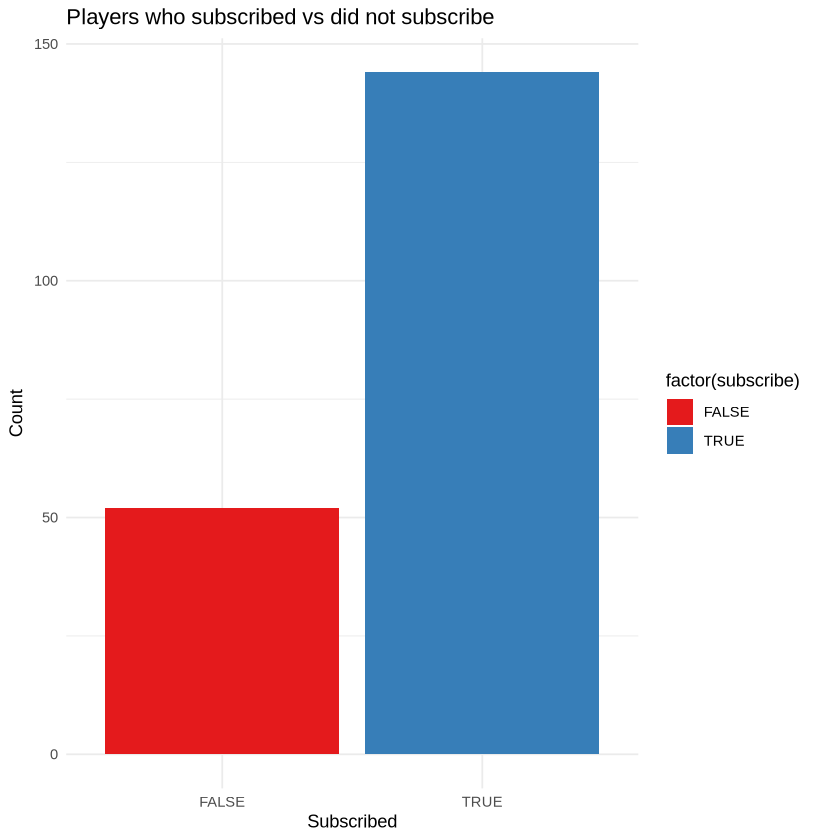

In [22]:
players |>
  ggplot(aes(x = subscribe, fill = factor(subscribe))) +
  geom_bar() +
  labs(
    title = "Players who subscribed vs did not subscribe",
    x = "Subscribed",
    y = "Count"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")


This bar chart shows the number of players who subscribed compared to those who did not.  
Colors were added for clarity, making it easier to distinguish between the two subscription groups.


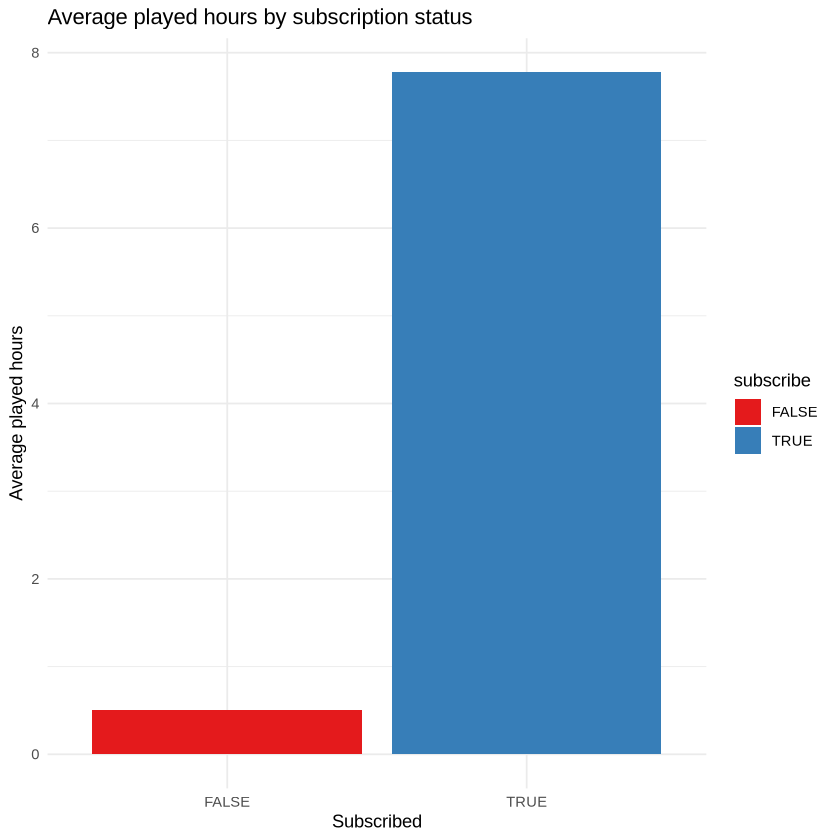

In [21]:
players |>
  group_by(subscribe) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = subscribe, y = mean_played_hours, fill = subscribe)) +
  geom_col() +
  labs(
    title = "Average played hours by subscription status",
    x = "Subscribed",
    y = "Average played hours"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")


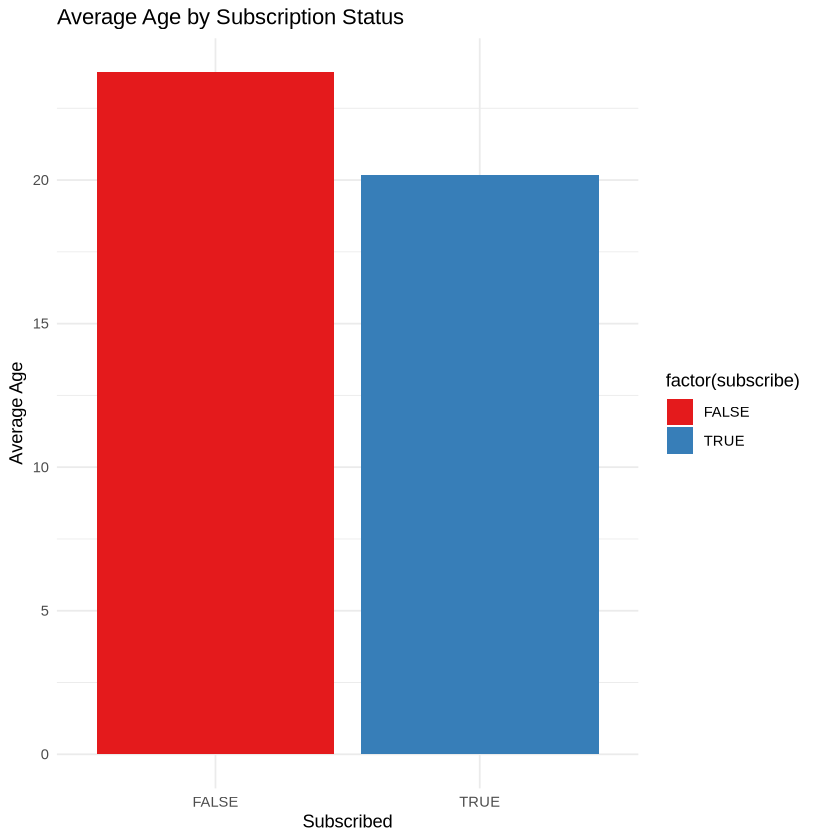

In [23]:
players |>
  group_by(subscribe) |>
  summarise(mean_age = mean(Age, na.rm = TRUE)) |>
  ggplot(aes(x = subscribe, y = mean_age, fill = factor(subscribe))) +
  geom_col() +
  labs(
    title = "Average Age by Subscription Status",
    x = "Subscribed",
    y = "Average Age"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")


This bar chart compares the average age of subscribed and non-subscribed players.  
If there is a visible difference, it may suggest that age influences subscription behaviour.

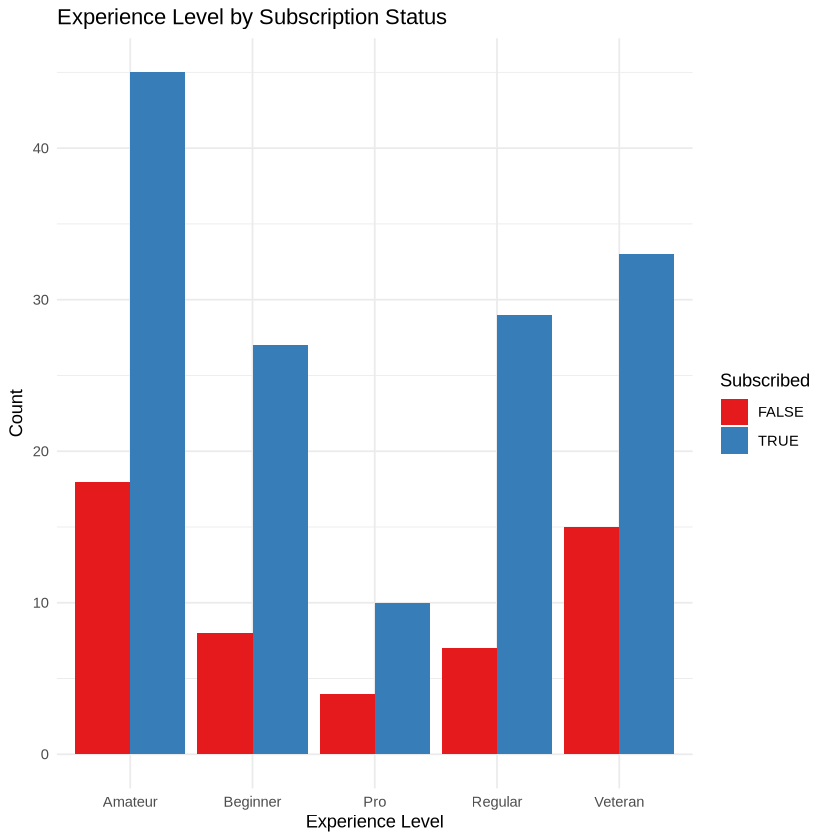

In [24]:
players |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Experience Level by Subscription Status",
    x = "Experience Level",
    y = "Count",
    fill = "Subscribed"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")

This chart shows how newsletter subscription varies across experience levels.  
If certain experience categories have noticeably more subscribers, experience may be an important predictor.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


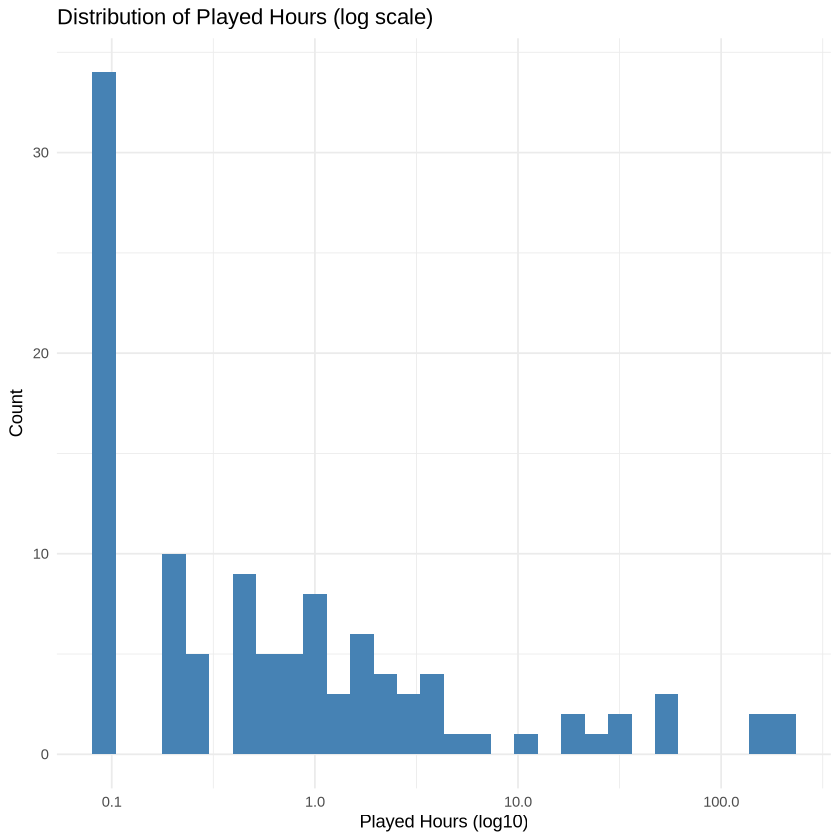

In [30]:
players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "steelblue") +
  scale_x_log10() +
  labs(
    title = "Distribution of Played Hours (log scale)",
    x = "Played Hours (log10)",
    y = "Count"
  ) +
  theme_minimal()


This histogram shows the distribution of played hours on a log scale.  
Most players only played for a short amount of time, while a few players spent many more hours on the server.  
This means the data is very uneven, with most values on the lower end and only a small number of players having very high playtime.  
Using a log scale helps show these differences more clearly.

### Summary of Exploratory Data Analysis and Visualization Findings

From the visualizations and summaries:

- The number of players who subscribed and those who did not is fairly uneven, with fewer subscribers overall.  
- Subscribed players tend to have higher average played hours, suggesting that players who spend more time playing are more likely to subscribe.  
- Experience level appears related to subscription, since some experience groups show more subscribers than others.  
- Age shows smaller differences between groups and may not have a strong effect.  
- The distribution of played hours is very uneven, with most players having low playtime and a few playing for many hours.

These results suggest that experience and total playtime may be the most useful predictors for modeling newsletter subscription later on.


## (4) Methods and Plan

The goal of this project is to predict whether a player subscribes to the newsletter based on their characteristics such as experience, age, gender, and played hours.  
Since the outcome variable `subscribe` is logical (TRUE/FALSE), this is a **classification** problem.

### Proposed Method
I plan to use a **K-Nearest Neighbours (KNN)** classifier to predict newsletter subscription.  
KNN is a simple, non-parametric algorithm that predicts the class of a new observation based on the majority class of its closest neighbours in the dataset.

### Why This Method is Appropriate
- The response variable is categorical, which makes classification methods suitable.  
- KNN can capture non-linear relationships between predictors (for example, combinations of experience and playtime).  
- It does not assume a specific data distribution.  
- It is easy to interpret visually and computationally simple for smaller datasets like this one.

### Assumptions
- Predictor variables are scaled appropriately (standardized) so that no single variable dominates the distance calculation.  
- All features used are relevant and not highly correlated with each other.  
- There are enough data points in each class (subscribed and not subscribed) to allow meaningful comparison.

### Data Processing Plan
1. Convert categorical variables such as `experience` and `gender` into numerical format using dummy variables or one-hot encoding.  
2. Scale numeric predictors like `Age` and `played_hours` using standardization.  
3. Split the dataset into **training (75%)** and **testing (25%)** sets to evaluate performance on unseen data.  
4. Optionally, use **cross-validation** to tune the number of neighbours (k).  
5. Compare prediction accuracy, sensitivity, and specificity between models if more than one method is attempted.

### Model Evaluation
Model performance will be measured using accuracy and the confusion matrix.  
If time allows, additional metrics such as precision, recall, and F1-score will also be considered to better understand the balance between false positives and false negatives.

### Summary
Overall, KNN is an appropriate starting method for this binary classification task because it is intuitive, easy to implement, and effective for small datasets.  
If results are poor, other models such as logistic regression or decision trees can be explored in the future.
